# Estimación por mínimos cuadrados
_Nicolás Villegas Vargas, María Camila Vásquez Correa_

Modelación Experimental, 2019-1

### ARMA: Datos artificiales

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Generamos datos con los siguientes parámetros

In [2]:
A = np.matrix([[.75,-0.25],[1, 0]])
D = np.matrix([[.65,.35],[0,0]])

In [3]:
# Simulacion de datos
p = 2
q = 2
nobs = 250
X = np.zeros((250,p))
# condicion inicial
X[0] = np.array([-0.5,-1.4])
# Ruido
e = np.random.normal(size=nobs)

In [4]:
for i in range(1, nobs):
    X[i] = X[i-1]*A.transpose() + np.array([e[i-1],e[i]])*D.transpose()

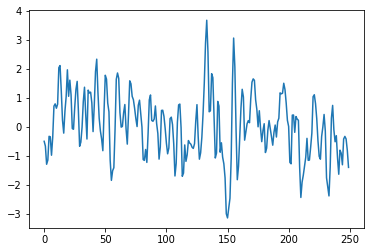

In [5]:
plt.plot(X.transpose()[0])
plt.show()

In [8]:
X = np.matrix(X)

### Ordinary Least Squares

### Estimación de parámetros

In [6]:
def ols(X, t):
    V = X[0].transpose()*X[1]
    G = X[0].transpose()*X[0]
    for i in range(1,t):
        V += X[i].transpose()*X[i+1]
        G += X[i].transpose()*X[i]
    return V.transpose()*np.linalg.inv(G)    

In [17]:
c1 = []
c2 = []
for t in range(5, nobs-1):
    c = ols(X, t)
    c1.append(c.A1[0])
    c2.append(c.A1[1])

In [18]:
a1 = [A.A1[0] for _ in range(nobs)]
a2 = [A.A1[1] for _ in range(nobs)]

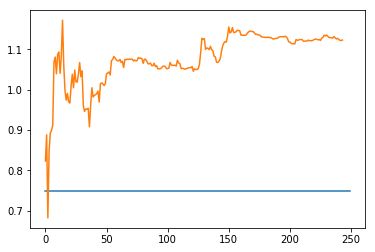

In [19]:
plt.plot(a1)
plt.plot(c1)
plt.show()

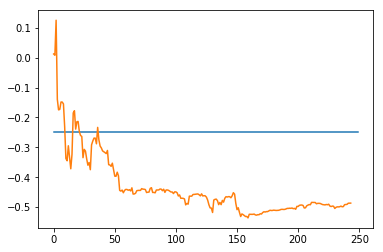

In [20]:
plt.plot(a2)
plt.plot(c2)
plt.show()

## Instrumental Variables

In [21]:
def IVols(X,t):
    V = []
    V = X[0].transpose()*X[2]
    G = X[2].transpose()*X[1]
    for i in range(1,t):
        V += X[i].transpose()*X[i+2]
        G += X[i+2].transpose()*X[i]
    return V.transpose()*np.linalg.inv(G)    

In [23]:
X = np.matrix(X)
c1 = []
c2 = []
for t in range(3, nobs-1):
    c = IVols(X, t)
    c1.append(c.A1[0])
    c2.append(c.A1[1])

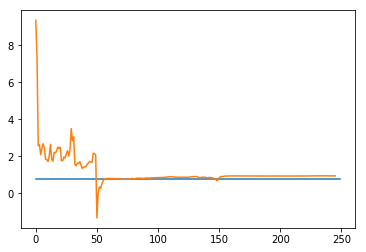

In [24]:
plt.plot(a1)
plt.plot(c1)
plt.show()

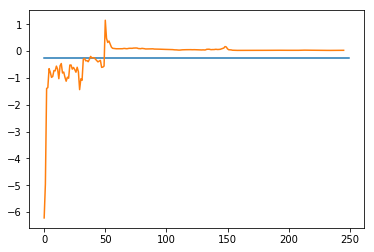

In [25]:
plt.plot(a2)
plt.plot(c2)
plt.show()

### Recursive Least Squares

In [27]:
V0 = X[0].transpose()*X[1]
G0 = X[0].transpose()*X[0]
R0 = np.linalg.inv(G0)
C0 = V0.T*R0

In [28]:
R1 = R0 - (R0*X[1].T*X[1]*R0)/(1+X[1]*R0*X[1].T)

In [29]:
X[0]

matrix([[-0.5, -1.4]])

In [30]:
C1 = C0 + (X[2].T - C0*X[1].T)*X[1]*R1

In [44]:
ols(X,3)

matrix([[0.99202774, 0.1754366 ],
        [1.        , 0.        ]])

In [32]:
C1

matrix([[-22.55850904,  -7.92817283],
        [ -3.1254948 ,  -1.33520763]])

In [33]:
def RLS(X, t):
    V = X[0].transpose()*X[1]
    G = X[0].transpose()*X[0]
    R = np.linalg.inv(G)
    C = V0.T*R0
    for i in range(1, t):
        R -= (R*X[i].T*X[i]*R)/(1+X[i]*R*X[i].T)
        C += (X[i+1].T - C*X[i].T)*X[i]*R
    return C

In [35]:
RLS(X,0)

matrix([[-4.,  0.],
        [ 0.,  0.]])

In [39]:
c1 = []
c2 = []
for t in range(50, nobs):
    c = RLS(X, t)
    c1.append(c.A1[0])
    c2.append(c.A1[1])

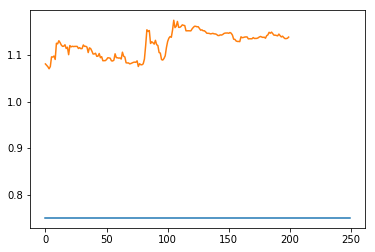

In [40]:
plt.plot(a1)
plt.plot(c1)
plt.show()

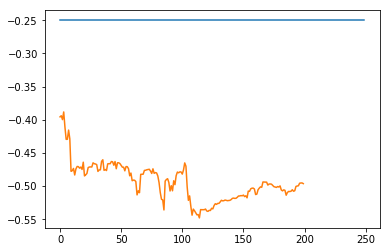

In [41]:
plt.plot(a2)
plt.plot(c2)
plt.show()